## Introduction

Automated systems for visual recognition tasks are ubiquitous in today's society and find application in several domains such as health care, robotics and even commercial products including autonomous driving cars. Convolutional Neural Networks algorithms are the current state of the art, used for visual recognition tasks. It has more or less replaced traditional computer vision based algorithms involving the use of feature based descritptors for object detection and recognition tasks. Many companies such as google, facebook, pinterest, uber etc, employ these class algorithms in their products. However,they first became prominent in the year 2012 when they were used to win the [ImageNet challenge](http://image-net.org/challenges/LSVRC/2016/) by [Alex Krizhevsky](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks).

This task of recognition or classification of an object comes to us humans easily, it does not take too long for us to differentiate a dog from a cat. We are not deterred by variations in scale, rotation, or even occlussion. We could recognize a dog even if we were given an image of its head or tail, and even recognize different breeds of dogs. But this is no ordinary task for a machine. 

For example, to succesfully classify the following set of images is a challenge for a computer vision algorithm. It is hard for an algorithm/machine to capture the visual concept of an object when all it has to go on is a matrix of numbers representing the light intensity at every point in a pixel.

[<img src="http://cs231n.github.io/assets/challenges.jpeg">](http://cs231n.github.io/assets/challenges.jpeg)(Credits :Cs231n course at Stanford)

Convolutional Neural Networks are very similar to the traditional vanilla version of Neural Networks in that they are made up of neurons that have learnable weights and biases. They receive raw pixels as input and output class scores/probabilities for a given input image. They do however make one explicit assumption, that the inputs to network are raw images, this in turn allows us to take into account the spatial information in the image along with the intensity information. In this tutorial, you will get a glimpse of how these network architectures are built and employed as high accuracy image classifiers.

### Tutorial content

This tutorial will introduce you to Convolution Neural Networks(CNN) and the illustrate how to build and run a simple convolution neural network  using the [TensorFlow](https://www.tensorflow.org) library.  

We will cover the following topics:
- [Installing the TensorFlow library](#Installing-the-libraries)
- [Load MNIST dataset ](#Load-MNIST-Dataset)
- [Construct a Convolution Neural Network using TensorFlow](#Convolutional-Neural-Network-using-a-Tensor-Flow-Graph)


## Installing the library

There are multiple methods to install TensorFlow. These methods are described in the [Getting Started](https://www.tensorflow.org/versions/r0.11/get_started/index.html) page. In this Tutorial, we will describe installing TensorFlow in its own virtual environment using the Anaconda package manager. Assuming Anaconda configured with Python 2.7 is already installed on your machine, the following steps will setup TensorFlow using `conda`:

   ##### Create a conda virtual environment name tensorflow:
    $ conda create -n tensorflow python=2.7

   ##### Activate the tensorflow virtual environment:
    $ source activate tensorflow
 (tensorflow)$  # Your prompt should change

   ##### Install TensorFlow:
     (tensorflow)$ conda install -c conda-forge tensorflow

    
Note that this installs the package in the `tensorflow` virtual enviroment and will not affect other system libraries.

### Checking the Installation
Open this Notebook in the `tensorflow` environment:

     (tensorflow)$ jupyter notebook

### Imports

In [36]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

##### Print Tensor Flow Version

In [37]:
tf.__version__

'0.10.0'

##### Hello Tensor Flow

In [38]:
hello = tf.constant('Welcome to the tutorial on Convolutional Neural Networks using TensorFlow!')
pds_session = tf.Session()
print(pds_session.run(hello))

Welcome to the tutorial on Convolutional Neural Networks using TensorFlow!


### Load MNIST Dataset

The MNIST data set will be automatically downloaded once the following code is executed. 

In [39]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### Print Data Sizes

In [40]:
print("Size of datasets :")
print("1) Training set:\t{}".format(mnist.train.images.shape))
print("2) Test set:\t\t{}".format(mnist.test.images.shape))
print("3) Validation set:\t{}".format(mnist.validation.images.shape))

Size of datasets :
1) Training set:	(55000, 784)
2) Test set:		(10000, 784)
3) Validation set:	(5000, 784)


The MNIST data-set has now been loaded and consists of 70,000 images along with their associated labels( 0-9 ).This dataset is split into 55,000 training images, 10,000 test images and the remaining 5,000 images constitute the validation set. The images are size normalized and centered and therefore do not require any additional pre-processing.

In [41]:
print("Size of tensor:")
print("1) Size of :\t{}".format(mnist.train.images[1].shape))

Size of tensor:
1) Size of :	(784,)


The mnist.train.images is referred to as a tensor, where the first dimension(55,000) refers to the number of images and the second dimension(784) is the vector representing a 28x 28 image of a hand written digit. Therefore images here are treated as points in a [784 dimensional space](http://colah.github.io/posts/2014-10-Visualizing-MNIST/).

#### One Hot Encoding
The class labels in this data set are one-hot encoded vectors. The class labels are originally integers which are converted to vectors by setting the parameter *"one_hot"* to **True** during data import. We can think of the label/class vectors as *n* dimensional vector where *n* is equal to the number of classes(0-9). For the nth digit,most of the dimensions in this vector are set to zero except for the nth dimension which is set to 1. The mnist.train.labels is a tensor of floats of shape [55000 10].

###### For example
Let us inspect the labels of the first 10 images in the train set(mnist.train.labels). We find that the first image belongs to class '8' and therefore the 8th element in the first row of the array is set to 1.

In [42]:
mnist.train.labels[0:10, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

### Display images

#### Function to display images

In [43]:
def display_images(num,images, true_class, cls_pred=None):
    assert len(images) == len(true_class) == num
    
    # Create figure with 4x4 sub-plots.
    fig, axes = plt.subplots(num/4, num/4)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
   
    

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape((28,28)), cmap='binary')

        # Set xlable to true and predicted classes.
        if cls_pred is None:
            xlabel = "Actual: {0}".format(true_class[i])
        else:
            xlabel = "Actual: {0}, Pred: {1}".format(true_class[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)

        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.suptitle('Images and their labels')    
    plt.show()


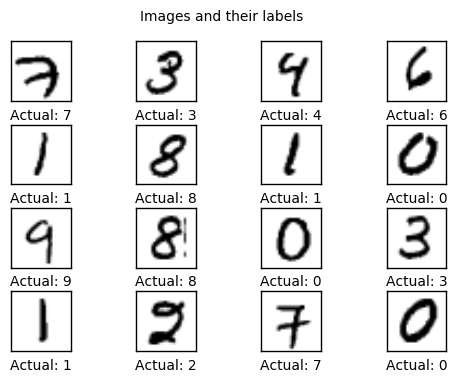

In [44]:
# Get the first images from the training  set
images = mnist.train.images[0:16]

# Get the actual class labels for those images.
data_train = np.argmax(mnist.train.labels, axis=1)
cls_true = data_test[0:16]

#Plot the images
display_images(num = 16,images=images, true_class=cls_true)

## Convolutional Neural Network

The vanilla version of neural network does not scale well to larger images. A single image in the MNIST data set is a 784 dimensional vector and therefore a single neuron in the first layer of a fully connected network will contain 784 weights that need to be computed. The number of weights will increase drastically for larger images and also these networks do not take into account any of the useful spatial information present in an image. We can now see why these architectures are not well suited for processing images.

On the other hand, the architecture of a convolutional neural network is designed to take advantage of the fact that the input consists of images. It contains neurons that are 3 dimensional that is each neuron has a width,height and depth. The depth here is a reference to depth of the neuron and not the depth of the entire network. The neurons in this architecture can be thought of as filters that are activated or fire when they see a pattern in the image that matches their own. Also in comparison to the traditional neural network,each neurons is not connected to the entire image but is confined to a local region of the image; an analogy can be drawn to a sensory neuron which is activated by a stimulus present in its receptive field.

The architecture of the Convolutional Neural Network mimics the architecture of neurons in the visual cortex of our brain and therefore has a similar hierarchical architecture as shown below:
[<img src="http://parse.ele.tue.nl/cluster/2/CNNArchitecture.jpg">](http://parse.ele.tue.nl/cluster/2/CNNArchitecture.jpg) *(Credits :Parallel Architecture Research Eindhoven)*


The Network constitutes the following layers:

1) Convolution layer : These layers are used for feature extraction while taking into account the rich spatial information present in the images.

2) Pooling layer : These layers are used to reduce dimensions of the features(activation maps)extracted from the convolutional layers and to only retain information that is important.

3) Fully connected layer: This layer is simply Multi Layer Perceptron that uses a soft max layer(multinomial logistic regression) to output class probabilities of the input image. This layer is usually the last layer in the network as shown above.

### Convolutional Neural Network using a Tensor Flow Graph

The Convolutional Neural Network model is constructed with layers similar to the figure above via  a TensorFlow Graph. The TensorFlow libray is used for efficient numerical computation. It does all the heavy lifting outside of python using efficient C++ code, similar to other libraries such as NumPy. However instead of switching back to python after every expensive operation, TensorFlow allows us to define an entire graph consisting of place holders(inputs), variables and operations for the entire network prior to the start of computation.Once the graph is defined the model is ready to be trained. This setup easily lends to efficient distributed computing.

### Convolution 
Convolutional networks obtain their name from the word 'Convolution', which is a mathematical operation ubiquitously used in image processing. This operation helps in extracting low level features from the input images such as edges ,countours or maybe patches of images enriched for a certain color. With subsequent layers of convolution with other filters the network eventually learns high level features such as wings when looking at image of a bird or paws of a dog as an example.

Every filter/kernel in a layer is treated as a sliding window of a certain size across the input image volume one pixel at a time. At every pixel/positon the dot product is computed between the entries of the filter and that of the overlapping image volume to result in a 2D feature/activation map. Let's say that we have *n* kernels, consequently we have *n* feature maps per kernel stacked up in the depth dimension. Therefore we are reducing the feature space in the width and breadth dimension but increasing it's depth. An intuitive demo of the convolution operation is available in the [CS231n course](http://cs231n.github.io/convolutional-networks/#conv) taught by Andrej Karpathy. 

In [45]:
def convolve(input_x, W, b):
    convolve_x = tf.nn.conv2d(input_x, W, strides=[1, 1, 1, 1], padding='SAME')
    bias = tf.nn.bias_add(convolve_x, b)
    relu = tf.nn.relu(bias)
    return relu

#### Pooling Layers
The pooling layers are used to downsample the feature space in order to retain information that is most important and discard the rest. For example, we can use a 2x2 window on a activation/feature map and only retain the max, mean or sum of features within that window frame. The most common metric used is max pooling unless otherwise stated. 

This step reduces the size of the features space making them computationally more manageable,i.e it reduces the number of parameters that need to be computed and also prevents overfitting. The more weights we have to learn the more likely the network will overfit.

In [46]:
def maxpool(input_x):
    size = [1, 2, 2, 1]
    return tf.nn.max_pool(input_x, ksize=size, strides=size, padding='SAME')

#### Define the convolutional neural network model

In [47]:
def convolution_net(x, biases, weights, dropout):
    # Flatten the input image
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer One and max pooling
    conv1 = convolve(x, weights['wconv1'], biases['bconv1'])
    conv1_maxpool = maxpool(conv1)

    # Convolution Layer Two and max pooling
    conv2 = convolve(conv1_maxpool, weights['wconv2'], biases['bconv2'])
    conv2_maxpool = maxpool(conv2)

    # Fully connected layer
    fc1_reshape = tf.reshape(conv2_maxpool, [-1, weights['wmodel'].get_shape().as_list()[0]])
    fc1_add = tf.add(tf.matmul(fc1_reshape, weights['wmodel']), biases['bmodel'])
    fc1_relu = tf.nn.relu(fc1_add)
    fc1_final = tf.nn.dropout(fc1_relu, dropout)

    # Prediction of class probabilities
    output = tf.add(tf.matmul(fc1_final, weights['output']), biases['output'])
    return output

#### Initialize Parameters

In [52]:
model_learning_rate = 0.001
training_iters = 20000
batch_size = 128
display_step = 10

# Network Parameters
model_input = 784 # (img shape: 28*28) reshaped into 784 dimensional vector.
model_classes = 10 # number of classes of digits
dropout = 0.75 # Dropout, probability to keep units

#### Initialize inputs to the graph

In [49]:
x = tf.placeholder(tf.float32, [None, model_input])
y = tf.placeholder(tf.float32, [None, model_classes])
keep_prob = tf.placeholder(tf.float32) 

#### Initialize Model

In [59]:
def weight_values(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_values(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [60]:
# Store layers weight & bias
weights = {}
weights['wconv1'] = weight_values([5, 5, 1, 32])
weights['wconv2'] = weight_values([5, 5, 32, 64])
weights['wmodel'] = weight_values([7*7*64, 1024])
weights['output'] = weight_values([1024, model_classes])

biases = {}
biases['bconv1'] = bias_values([32])
biases['bconv2'] = bias_values([64])
biases['bmodel'] = bias_values([1024])
biases['output'] = bias_values([model_classes])

# Construct model
pred = convolution_net(x, biases, weights, keep_prob)

# Define total cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))

# Define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = model_learning_rate).minimize(cost)

# Predict output
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

# Evaluate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



### Launch the TensorFlow graph

Before launching the graph we must first create an operation that will initialize all the variables we have defined so far.

In [ ]:
# Initializing the variables
init = tf.initialize_all_variables()

In [63]:
# Begin the tensorflow session for training
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    num_steps = step * batch_size
    while num_steps < training_iters:
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization operation
        feed_dict1 = {x: batch_x, y: batch_y, keep_prob: dropout}
        sess.run(optimizer, feed_dict=feed_dict1)
        
        if step % display_step == 0:
            # Calculate batch loss and accuracy
            feed_dict2 = {x: batch_x, y: batch_y, keep_prob: 1.}
            loss, acc = sess.run([cost, accuracy], feed_dict = feed_dict2)
            print "Iter " + str(num_steps) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc)
        step += 1
        num_steps = step * batch_size
    print "Optimization Completed"

    # Calculate accuracy for test images
    print "Test Accuracy:", \
        sess.run(accuracy, feed_dict={x: mnist.test.images,y: mnist.test.labels,
                                      keep_prob: 1.})

Iter 1280, Minibatch Loss= 1.130665, Training Accuracy= 0.64844
Iter 2560, Minibatch Loss= 0.759966, Training Accuracy= 0.85938
Iter 3840, Minibatch Loss= 0.323015, Training Accuracy= 0.88281
Iter 5120, Minibatch Loss= 0.326763, Training Accuracy= 0.88281
Iter 6400, Minibatch Loss= 0.194050, Training Accuracy= 0.94531
Iter 7680, Minibatch Loss= 0.183821, Training Accuracy= 0.94531
Iter 8960, Minibatch Loss= 0.213975, Training Accuracy= 0.96094
Iter 10240, Minibatch Loss= 0.145514, Training Accuracy= 0.94531
Iter 11520, Minibatch Loss= 0.121631, Training Accuracy= 0.97656
Iter 12800, Minibatch Loss= 0.127156, Training Accuracy= 0.96094
Iter 14080, Minibatch Loss= 0.128761, Training Accuracy= 0.96875
Iter 15360, Minibatch Loss= 0.120064, Training Accuracy= 0.96875
Iter 16640, Minibatch Loss= 0.115209, Training Accuracy= 0.96094
Iter 17920, Minibatch Loss= 0.095444, Training Accuracy= 0.95312
Iter 19200, Minibatch Loss= 0.102321, Training Accuracy= 0.98438
Optimization Completed
Test Accu

### Visualization of data

[t-SNE](https://lvdmaaten.github.io/tsne/) is a dimensionality reduction technique which is often used for visualizing high dimensional data sets. This method is employed to visualize how the network learns to separate data representing the 10 different classes of digits and the details of how to implement this technique can be found in [Arthur Juilani's](https://medium.com/@awjuliani/visualizing-deep-learning-with-t-sne-tutorial-and-video-e7c59ee4080c#.d0zhpwu4g)blog post on "Visualizing Deep Learning with t-SNE" .

## Summary and Resources
This tutorial barely scratches the surface on what can be achieved using convolution neural networks. This is also by no means a comprehensive tutorial on convolutional neural networks.
More details about the tensorflow library and the theory behind the convolutional neural networks can be sought out from the following links:

1) **Theory behind convolutional neural networks :**

(i) [Convolutional Neural Networks course](http://cs231n.github.io/convolutional-networks/) by Andrej Karpathy 

(ii) [Deep Learning Tutorial](http://deeplearning.stanford.edu/tutorial/) from Stanford.

(iii) [The deep learning book](http://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio and Aaron Courville. 

(iv) [Free Online Book](http://neuralnetworksanddeeplearning.com/) on Deep Learning by Michael Nielson.


2) **To gain some Intuition about Convolutional Neural Networks you can refer to :**

(i) [A beginner's guide to understanding convolutional neural networks](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/) by Adit Deshpande.

(ii) [Deep Learning and Convolutional Neural Networks](https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721#.tt45r2xpz) by Adam Geitgey


3) **For More Details of Implementation using Tensor Flow:**

(i) [TensorFlow Mechanics 101](https://www.tensorflow.org/versions/r0.11/tutorials/mnist/tf/index.html#tensorflow-mechanics-101)


4) **Visualization :**

(i) [ Jason Yosinski's](https://www.youtube.com/watch?v=AgkfIQ4IGaM) video provides us with methods to visualize the outputs of the convolution filters.

(ii) The [Visualizing and Understanding Convolutional Networks paper](http://www.matthewzeiler.com/pubs/arxive2013/arxive2013.pdf) from Matt Zeiler and Rob Fergus discusses a visualization technique that allow us to view the evolution of the features during training.

As you have seen so far , this tutorial is only an introduction a simple convolutional neural network and mainly focuses on the ease with which one can set up their own neural networks using tensorflow. You can explore the several convolutional neural network architectures that have been put forth by the research community and well summarized [here](https://adeshpande3.github.io/adeshpande3.github.io/The-9-Deep-Learning-Papers-You-Need-To-Know-About.html) or even download the latest models to train and test your own images. One such example is illustrated by  [ Magnus Erik Hvass ](https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/07_Inception_Model.ipynb). 


## References
1. TensorFlow: https://www.tensorflow.org
2. MNIST databasee : http://yann.lecun.com/exdb/mnist/
3. The theory behind ConvNets : http://cs231n.github.io/convolutional-networks/ 
4. Convnets TensorFlow : https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/convolutional_network.ipynb
5. Tutorials : https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/02_Convolutional_Neural_Network.ipynb; https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/convolutional_network.ipynb
6. Visualizing Deep Learning with t-SNE : (https://medium.com/@awjuliani/visualizing-deep-learning-with-t-sne-tutorial-and-video-e7c59ee4080c#.gkgmt2v94 